### HW03: Practice with SVM, kNN, gradient descent, feature engineering

Anais Corona Perez (NetID: coronaperez)

In [1]:
import pandas as pd
from io import StringIO
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

## 1. Visualize classifier decision boundaries.

## 1a. Complete the function in the next cell that plots a classifier's decision boundary.
Or, rather, it plots a classifier's decisions over an area, revealing the boundary.

Hint: My solution used 10 lines:
- Make linspaces of grid_resolution points in xlim and grid_resolution points in ylim.
  e.g. For xlim=(-1, 1), ylim=(0, 2) and grid_resolution=3, make the linspace
  (-1, 0, 1) of x coordinates and the linspace (0, 1, 2) of y coordinates.
- Use np.tile() to repeat the x grid points grid_resolution times
  (e.g. (-1, 0, 1, -1, 0, 1, -1, 0, 1)) and np.repeat() to repeat each of the y grid
  points grid_resolution times (e.g. (0, 0, 0, 1, 1, 1, 2, 2, 2)).
- Use np.stack() to combine the x grid points and y grid points into a 2D array of
  size grid_resolution$^2$ x 2. (e.g.
  [[-1, 0],
   [0, 0],
   [1, 0],
   [-1, 1],
   [0, 1],
   [1, 1],
   [-1, 2],
   [0, 2],
   [1, 2]]
  )
- Use pd.DataFrame(), setting its `columns` parameter to `clf.feature_names_in_`, to get a DataFrame.
- Make a dictionary keyed by -1 and 1 with values 'pink' and 'lightskyblue'.
- Use clf.predict() on the 2D array of points to get predicted y values.
- For each y in {-1, 1}, use plt.plot() to plot those points in your 2D array
  with that predicted y value in the color specified by your dictionary.

In [2]:
def plot_decision_boundary(clf, xlim, ylim, grid_resolution):
    """Display how clf classifies each point in the space specified by xlim and ylim.
    
    - clf is a classifier (already fit to data).
    - xlim and ylim are each 2-tuples of the form (low, high).
    - grid_resolution specifies the number of points into which the xlim is divided
      and the number into which the ylim interval is divided. The function plots
      grid_resolution * grid_resolution points."""
    
    x = np.tile(np.linspace(xlim[0], xlim[1], grid_resolution), grid_resolution)
    y = np.repeat(np.linspace(ylim[0], ylim[1], grid_resolution), grid_resolution)
    pairs = np.stack((x, y), 1)
    df = pd.DataFrame(pairs, columns = clf.feature_names_in_)
    colors = {-1: 'pink', 1: 'lightskyblue'}
    pred = clf.predict(pairs)
    #go through each x0, x1 pair and plot in the correct color
    for i in range(0, len(pred)):
        plt.plot(df['x0'][i], df['x1'][i], '.', color = colors[pred[i]])
    

### Visualize the decision boundary for an SVM.
Here I have provided test code for your function to visualize the decision boundary for the SVM
under the header "Now try 2D toy data" inhttps://pages.stat.wisc.edu/~jgillett/451/burkov/01/01separatingHyperplane.html.

Recall: That SVM's decision boundary was $y = -x + \frac{1}{2}$, so your function should make a plot with lightskyblue above that line and pink below that line. Then my code adds the data points in blue and red.

There is nothing for you to do in this step, provided you implemented the required function above.



/Users/anaiscoronaperez/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


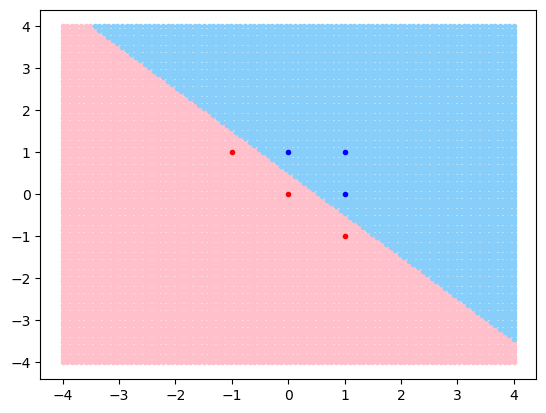

In [3]:
data_string = """
x0, x1,  y
 0,  0, -1
-1,  1, -1
 1, -1, -1
 0,  1,  1
 1,  1,  1
 1,  0,  1
"""
df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python')
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(df[['x0', 'x1']], df['y'])

# Call student's function.
plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

### 1b. Visualize the decision boundary for a decision tree.
- Make a decision tree classifier on the same df used above.
  (Use criterion='entropy', max_depth=None, random_state=0.)
- Use print(export_text()) to print a text version of your tree.
- Copy the last few lines of the cell above to make the plot.
- Study the tree and plot until you understand how the plot represents the decisions in the tree.

|--- x1 <= -0.50
|   |--- class: -1
|--- x1 >  -0.50
|   |--- x0 <= 0.50
|   |   |--- x0 <= -0.50
|   |   |   |--- class: -1
|   |   |--- x0 >  -0.50
|   |   |   |--- x1 <= 0.50
|   |   |   |   |--- class: -1
|   |   |   |--- x1 >  0.50
|   |   |   |   |--- class: 1
|   |--- x0 >  0.50
|   |   |--- class: 1



/Users/anaiscoronaperez/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


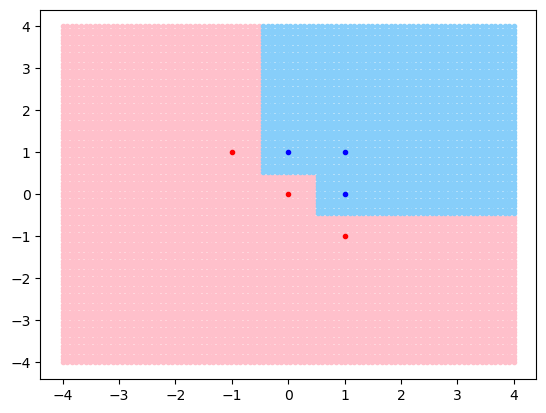

In [4]:
# Train and print tree
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, random_state = 0).fit(df[['x0', 'x1']], df['y'])
print(export_text(clf, feature_names = ['x0', 'x1']))

# Plot
plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

### 1c. Visualize the decision boundary for kNN with $k=3$.
- Make a kNN classifier on the same df used above. (Use n_neighbors=3 and metric='euclidean'.)
- Copy the plotting code again.

(Experiment with $k=1$ and $k=2$ to see how the decision boundary varies with $k$ before setting $k=3$.)

/Users/anaiscoronaperez/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


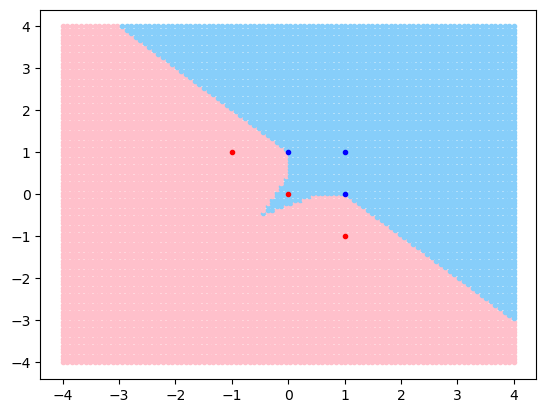

In [5]:
# Train kNN model
for i in range(len(df[['x0', 'x1']])):
    knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean').fit(df[['x0', 'x1']], df['y'])

# Plot
plot_decision_boundary(clf=knn, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

### 1d. Visualize the decision boundary for an SVM with a nonlinear boundary.
Use the example under the header "Nonlinear boundary: use kernel trick" in https://pages.stat.wisc.edu/~jgillett/451/burkov/03/03SVM.html.
- Read the data from http://www.stat.wisc.edu/~jgillett/451/data/circles.csv.
  This ".csv" file has y in {0, 1}, so change the 0 values to -1.
- Fit an SVM with kernel='rbf', C=1, gamma=1/2.
- Copy the last few lines of my plotting code, above, again (revising the axis limits) to make the boundary plot.

(Experiment with $\gamma = 2$, $\gamma = 10$, and $\gamma = 30$ to see how the decision boundary varies with gamma before setting gamma to 1/2.)

/Users/anaiscoronaperez/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


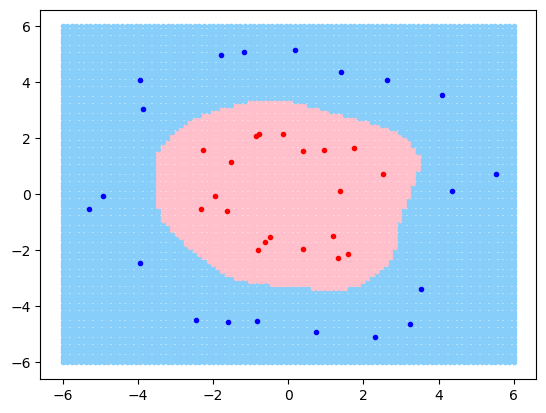

In [6]:
# Create dataframe
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/circles.csv')
df['y'] = df['y'].replace(0, -1)

# Train svm model
svm = svm.SVC(kernel = 'rbf', C = 1, gamma = 1/2).fit(df[['x0', 'x1']], df.y)

# Plot
plot_decision_boundary(clf=svm, xlim=(-6, 6), ylim=(-6, 6), grid_resolution=100)
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

## 2. Run gradient descent by hand.
Run gradient descent with $\alpha = 0.1$ to minimize $z = f(x, y)
= (x + 1)^2 + (y + 2)^2$. Start at (0, 0) and find the next two points
on the descent path.

Hint: The minimum is at (-1, -2), so your answer should be approaching this point.

First, find $\Delta f(x, y)$ and keep in mind $\alpha$ and the equation to find $x_{i+1}$:

$
\Delta f(x, y) = (2x+2, 2y+4) \hspace{1cm} \alpha = 0.1 \hspace{1cm} x_{i+1} = x_i -\alpha\Delta f(x_i, y_i)
$

Now, start at (0,0) to find $x_1$:

$
x_0 = (0,0) \hspace{1cm} \Delta f(0, 0) = (2,4) \hspace{1cm} -\alpha\Delta f(0, 0) = (-0.2, -0.4)
$

Continue using $x_1$:

$
x_1 = (-0.2, -0.4) \hspace{1cm} \Delta f(-0.2, -0.4) = (1.6, 3.2) \hspace{1cm} -\alpha\Delta f(-0.2, -0.4) = (-0.16, -0.32)
$

Finally, we reach the second point on the descent path:

$
x_2 = (-0.36, -0.72)
$

## 3. Practice feature engineering
by exploring the fact that rescaling may be necessary for kNN but not for a decision tree.

### 3a. Read and plot a toy concentric ellipses data set.

- Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv](http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv) into a DataFrame.
- Display the first five rows.
- Plot the data.
  - Put x0 on the $x$ axis and x1 on the $y$ axis.
  - Plot points with these colors:
    - $y=0$: red
    - $y=1$: blue
  - Use $x$ and $y$ axis limits of $(-6, 6)$.
  - Include a legend.

,x0,x1,y
0,-1.937,-0.006,0
1,-1.622,-0.057,0
2,-0.791,-0.200,0
3,-0.614,-0.171,0
4,-0.490,-0.154,0


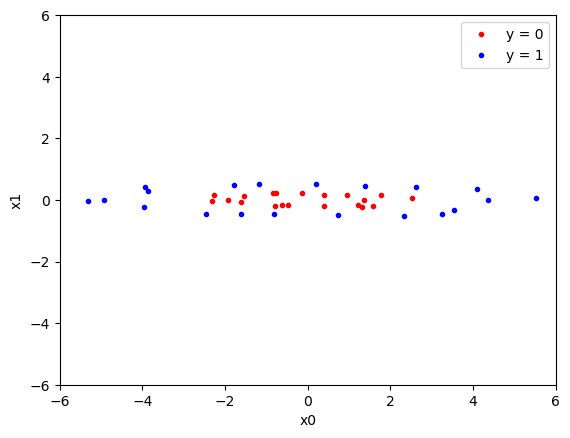

In [7]:
# Create dataframe
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv')

# Plot
colors = {0:'red', 1:'blue'}
for y in (0, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y], label = f'y = {y}')
plt.legend()
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xlabel('x0')
plt.ylabel('x1')

# Display first five rows
df.head(5)


### 3b. Train a $k$NN classifier and report its accuracy.
- Use $k = 3$ and the (default) euclidean metric.
- Report the accuracy on the training data by writing a line like `Training accuracy is 0.500`
  (0.500 may not be correct).

In [8]:
X = df[['x0', 'x1']]
y = df['y']

# Train kNN model and report accuracy
for i in range(len(df[['x0', 'x1']])):
    knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean').fit(X, y)
print(f'Training accuracy is: {knn.score(X, y)}')

Training accuracy is: 0.725


### 3c. Now rescale the features using standardization; plot, train, and report accuracy again.
- Fit the scaler to the training features.
- Transform the training features.
- Plot the rescaled data.
- Train kNN again and report its accuracy as before. (Notice that rescaling helped.)

Training accuracy for rescaled features is: 1.0


Text(0, 0.5, 'x1')

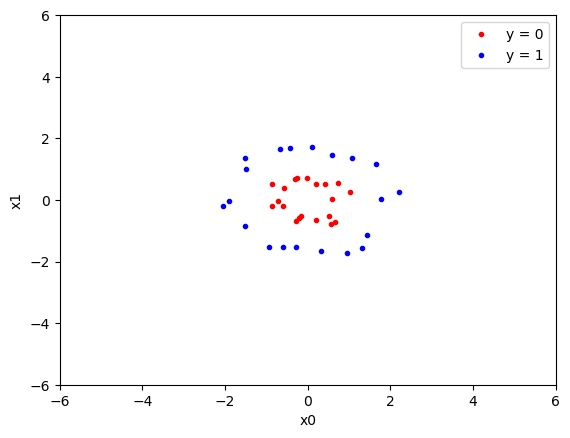

In [9]:
# Rescale features and place in a new dataframe
df_rescaled = df
X_scaled = StandardScaler().fit_transform(X)
df_rescaled['x0'] = X_scaled[:,0]
df_rescaled['x1'] = X_scaled[:,1]

# Train kNN model and print accuracy
X = df_rescaled[['x0', 'x1']]
y = df_rescaled['y']

for i in range(len(df[['x0', 'x1']])):
    knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean').fit(X, y)
    
print(f'Training accuracy for rescaled features is: {knn.score(X, y)}')

# Plot
colors = {0:'red', 1:'blue'}
for y in (0, 1):
    plt.plot(df_rescaled.x0[df.y == y], df_rescaled.x1[df.y == y], '.', color=colors[y], label = f'y = {y}')
plt.legend()
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xlabel('x0')
plt.ylabel('x1')

### 3d. Train a decision tree classifier on the original (unscaled) data and report its accuracy.
- Train on the training data.
- Report the accuracy as before.

In [10]:
# Train tree and print accuracy
X = df[['x0', 'x1']]
y = df['y']

clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, random_state = 0).fit(X, y)

print(f'Training accuracy is: {clf.score(X, y)}')


Training accuracy is: 1.0


In [11]:
# Train tree on rescaled data and print accuracy
X = df_rescaled[['x0', 'x1']]
y = df_rescaled['y']

clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, random_state = 0).fit(X, y)

print(f'Training accuracy on rescaled data is: {clf.score(X, y)}')

Training accuracy on rescaled data is: 1.0


### 3e. Why is feature scaling unnecessary for an ID3 decision tree? Answer in a markdown cell.

kNN requires feature scaling as it depends on distance for classification, decision trees do not. Regardless if the features are scaled or not, the tree will adapt appropriately to the data and provide equal accuracy on either the scaled or unscaled data since the values provided to the equations: $f_{ID3}(S)$, $H(S)$, and $S(S_-, S_+)$ will give the appropriate feature, threshold pair on which to split the tree.